# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")

Loaded 196,313 records with features


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


In [16]:
print(df.columns)

Index(['Station Name', 'Air Temperature', 'Wet Bulb Temperature', 'Humidity',
       'Rain Intensity', 'Interval Rain', 'Total Rain', 'Precipitation Type',
       'Wind Direction', 'Wind Speed', 'Maximum Wind Speed',
       'Barometric Pressure', 'Solar Radiation', 'Heading', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID', 'season',
       'Wind Speed Squared', 'Is Raining', 'Gust Factor', 'Wind Direction X',
       'Wind Direction Y', 'Rain Intensity x Humidity', 'Humidity Level',
       'Sin_Hour', 'Cos_Hour'],
      dtype='object')


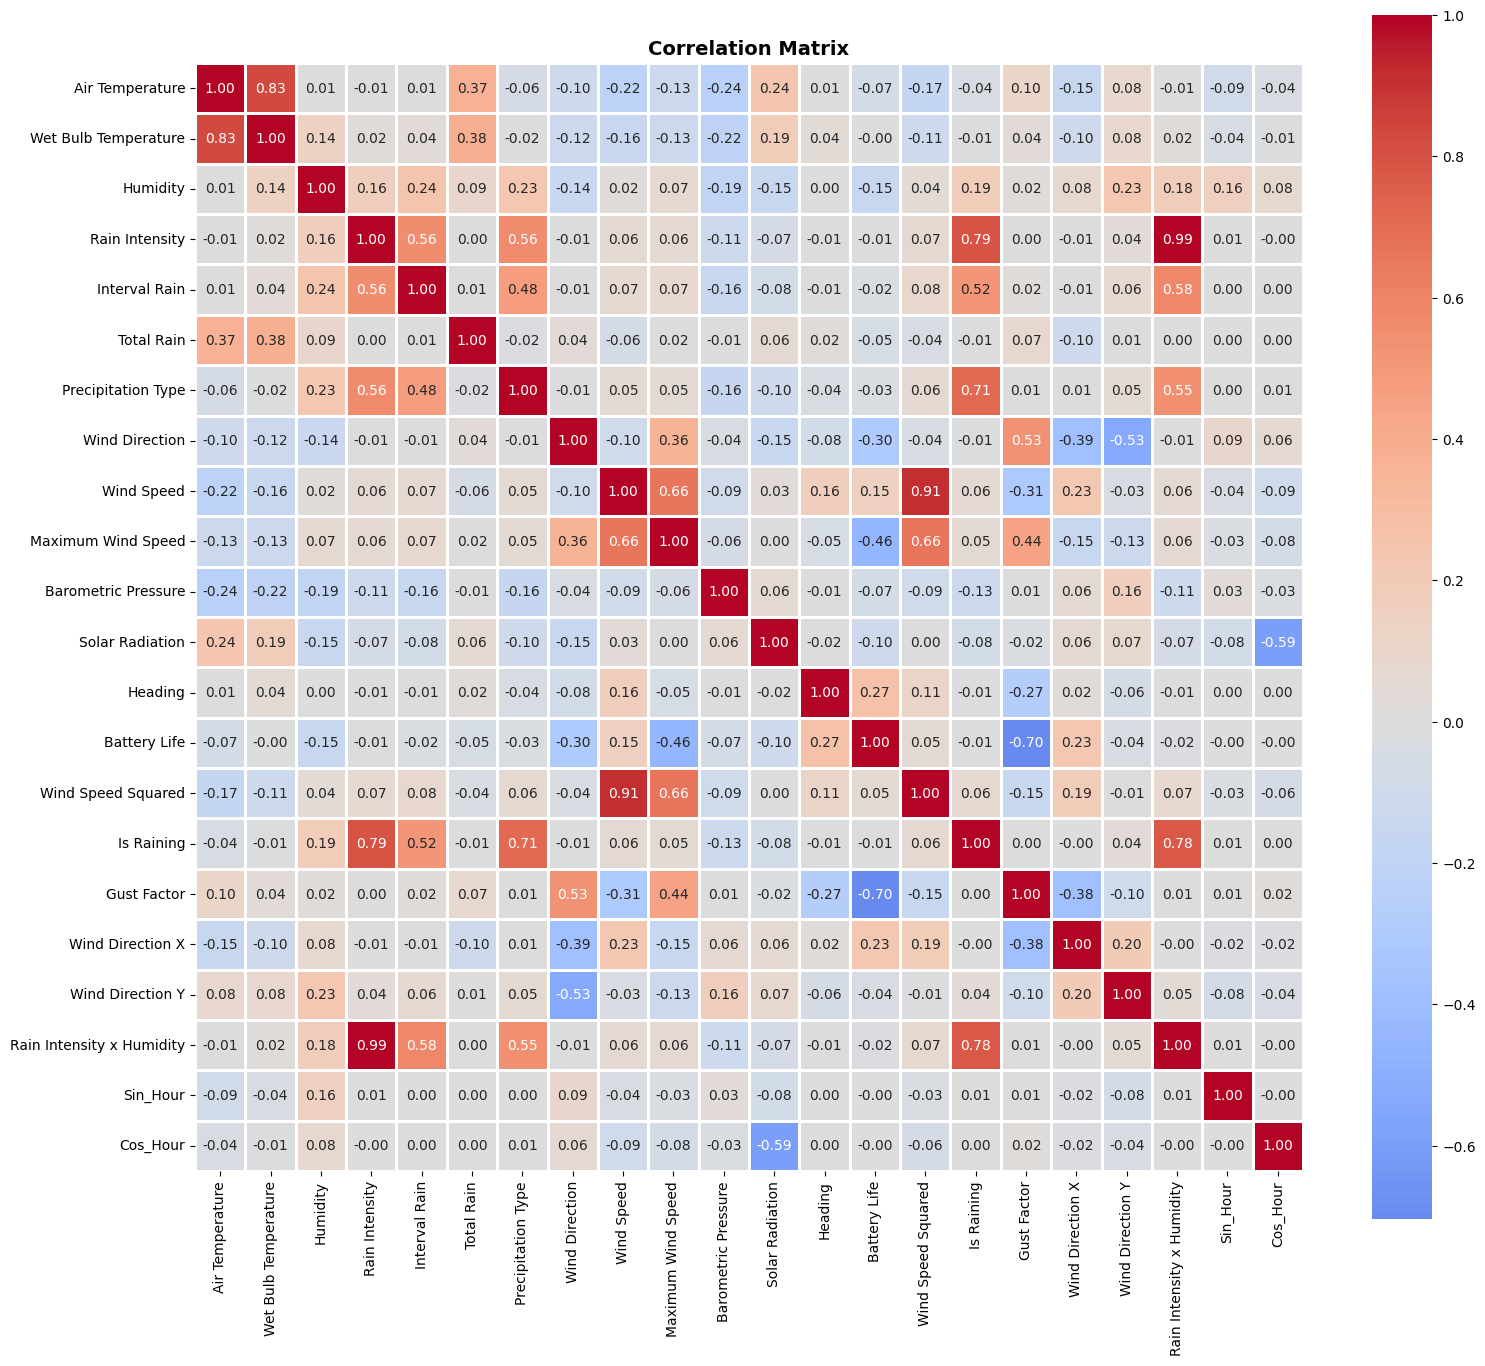

In [17]:
#q5_correlations.csv

correlation_matrix_columns = df.select_dtypes(include=[np.number])

correlation_matrix = correlation_matrix_columns.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

correlation_matrix.to_csv('output/q5_correlations.csv', index = False)

/Users/audreysu/p3/lib/python3.10/site-packages/seaborn/relational.py:292: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()
/Users/audreysu/p3/lib/python3.10/site-packages/seaborn/relational.py:292: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sub_data = grouped.apply(agg, other).reset_index()
/Users/audreysu/p3/lib/python3.10/site-packages/seaborn/relational.py:292: F

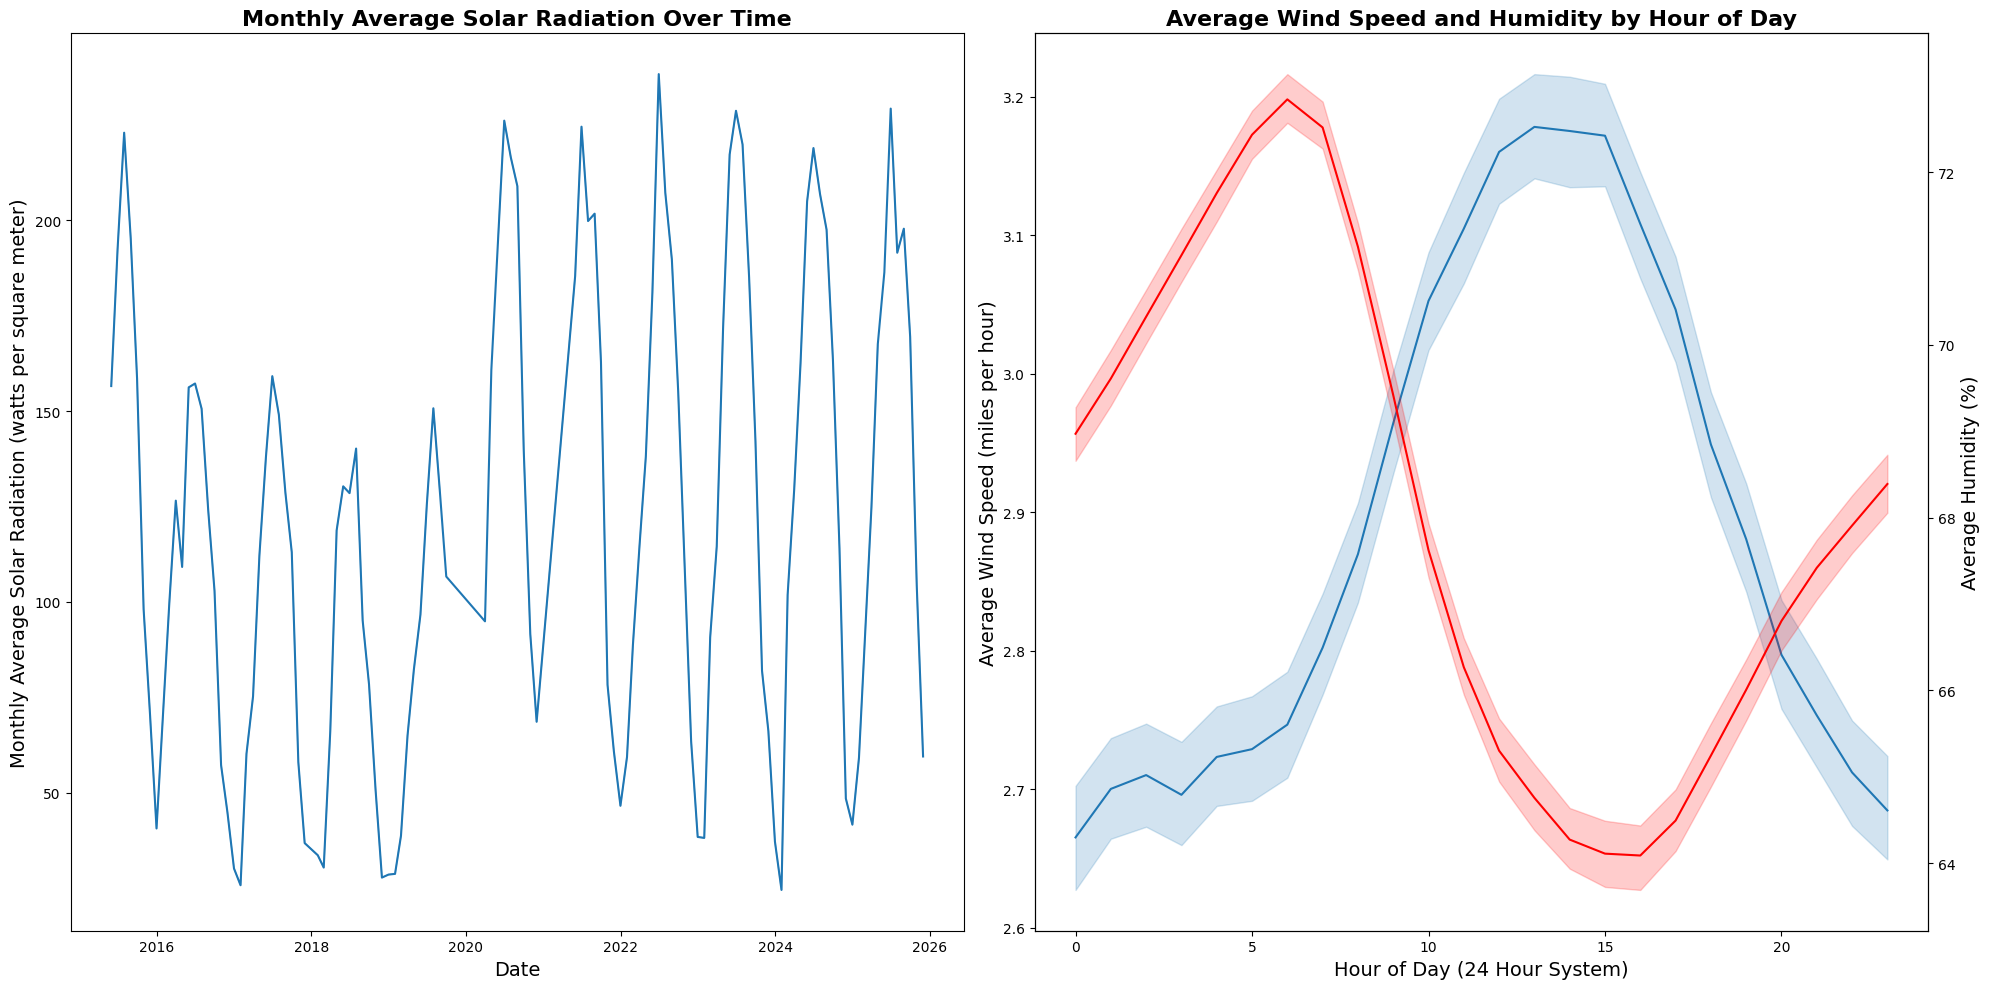

In [31]:
#output/q5_patterns

df['Monthly Average Solar Radiation'] = df['Solar Radiation'].resample('ME').mean()
df['Monthly Average Wind Speed'] = df['Wind Speed'].resample('ME').mean()
df['Monthly Average Total Rain'] = df['Total Rain'].resample('ME').mean()

df_new = df.copy().reset_index()
df_new['hour'] = df_new['Measurement Timestamp'].dt.hour
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.lineplot(data = df_new, x = 'Measurement Timestamp', y='Monthly Average Solar Radiation', ax=axs[0])
axs[0].set_title('Monthly Average Solar Radiation Over Time', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Date', fontsize=14)
axs[0].set_ylabel('Monthly Average Solar Radiation (watts per square meter)', fontsize=14)
# sns.lineplot(data=df_new, x='Measurement Timestamp', y='Monthly Average Wind Speed', ax=axs[0])
# sns.lineplot(data=df_new, x= 'Measurement Timestamp', y='Monthly Average Total Rain', ax=axs[0])
ax2 = axs[1].twinx()
sns.lineplot(data = df_new, x = 'hour', y='Wind Speed', ax=axs[1])
sns.lineplot(data = df_new, x = 'hour', y='Humidity', ax=ax2, color = 'red')
axs[1].set_title('Average Wind Speed and Humidity by Hour of Day', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Hour of Day (24 Hour System)', fontsize=14)
axs[1].set_ylabel('Average Wind Speed (miles per hour)', fontsize=14)
ax2.set_ylabel('Average Humidity (%)', fontsize=14)
plt.tight_layout()
plt.savefig('output/q5_patterns.png', dpi=300)

In [ ]:
#q5_trend_summary.txt
with open('output/q5_trend_summary.txt', 'w') as f:
    f.write("Trend Analysis Summary:\n")
    f.write("1. Solar Radiation shows a seasonal pattern with peaks during summer months and troughs during winter months.\n")
    f.write("2. Wind Speed tends to be higher during the afternoon hours, peaking around mid-day.\n")
    f.write("3. Humidity levels are generally higher during early morning hours and decrease as the day progresses.\n")